# Model Clustering Menggunakan K-Means

## Import Library

In [70]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import silhouette_score
from math import pi

## Modeling dengan dataset yang di Label Encode

### Load Dataset

In [71]:
#Dataset Label Encoder
df_label = pd.read_csv('DataCleanLabel.csv')
df_label.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,Normal_Weight
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,Normal_Weight
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,Normal_Weight
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,Overweight_Level_I
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,Overweight_Level_II


### Feature Selection dan Scaling Data

In [72]:
#Feature Selection
obese_level = df_label['NObeyesdad']    
df_label = df_label.drop(columns=['NObeyesdad'])
# df_label = df_label.drop(columns=['NObeyesdad', "Height", "Weight", "CALC", "SMOKE","Age","SCC"])

# # scaled, k=2, hasilnya 0.53
# df_label_cluster = df_label[['Weight', 'Height', 'family_history_with_overweight', 'FAVC', 'CAEC', 'FAF', "FCVC", 'NCP', 'SMOKE', 'SCC']]


# df_label_cluster ["BMI"]= df_label_cluster['Weight'] / ((df_label_cluster['Height']/100) ** 2)
# df_label_cluster = df_label_cluster.drop(columns=['Weight', 'Height'])
# # df_label_cluster = df_label[['Weight', 'Height', 'family_history_with_overweight', 'FAVC', 'CAEC_Sometimes', 'CAEC_no', 'FAF', 'CAEC_Frequently', 'NCP', 'SMOKE', 'SCC']]

features = [                                   
    'FAVC', 'CAEC','FAF','NCP', 'SMOKE', 'SCC', 'FCVC'                 
]

df_label_cluster = df_label[features]
#Data Standardization
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_label_cluster)

### Menentukan Jumlah Cluster Optimal menggunakan Elbow Method

K=1, Inertia=837.9933886062815
K=2, Inertia=699.4499545765048
K=3, Inertia=515.3159465965828
K=4, Inertia=435.750586208447
K=5, Inertia=376.36517689351626
K=6, Inertia=321.74241393730216
K=7, Inertia=295.22852957214604
K=8, Inertia=279.86737744108
K=9, Inertia=256.2306415049524


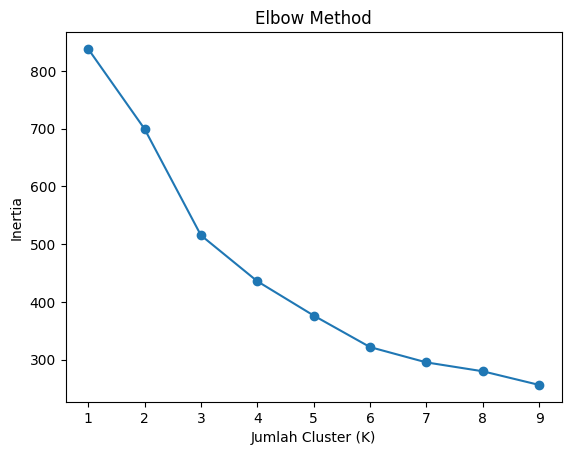

In [73]:
#Elbow Method
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, )
    kmeans.fit(df_scaled)
    print(f'K={k}, Inertia={kmeans.inertia_}')
    inertia.append(kmeans.inertia_)
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

### Modeling dengan cluster yang telah di tentukan

In [18]:
K = 6 # Tentukan jumlah cluster berdasarkan Elbow Method
kmeans = KMeans(n_clusters=K, random_state=42, n_init=10, init='k-means++')
kmeans.fit(df_scaled)
labels = kmeans.labels_
df_label["Cluster"] = labels
# df_label['NObeyesdad'] = obese_level
df_label.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Cluster
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,Normal_Weight,3
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,Normal_Weight,5
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,Normal_Weight,3
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,Overweight_Level_I,3
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,Overweight_Level_II,3


In [19]:
#shilhouette score
score = silhouette_score(df_scaled, labels)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.32743854668082173


## Modeling dengan dataset yang di OneHot Encode

### Load Dataset

In [76]:
# DataSet
df_onehot = pd.read_csv('DataCleanOneHot.csv')
# df_onehot = df_onehot.drop(columns=['NObeyesdad', "Height", "Weight"])
# # Feature Selection
# df_onehot_cluster = df_onehot[["FAVC", "FCVC", "NCP" ,"CAEC_Frequently","CAEC_Sometimes","CAEC_no" ,"FAF" ,"TUE" , "MTRANS_Bike" ,"MTRANS_Motorbike",	"MTRANS_Public_Transportation",	"MTRANS_Walking"]]
# df_onehot.head()'
df_onehot.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2064 entries, 0 to 2063
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 2064 non-null   float64
 1   Height                              2064 non-null   float64
 2   Weight                              2064 non-null   float64
 3   FCVC                                2064 non-null   float64
 4   NCP                                 2064 non-null   float64
 5   CH2O                                2064 non-null   float64
 6   FAF                                 2064 non-null   float64
 7   TUE                                 2064 non-null   float64
 8   NObeyesdad                          2064 non-null   object 
 9   Gender_Male                         2064 non-null   int64  
 10  SMOKE_yes                           2064 non-null   int64  
 11  FAVC_yes                            2064 no

### Feature Selection dan Scaling Data

In [77]:
# df_onehot_cluster = df_onehot[["Weight", "Height", "FAVC_yes", "FCVC", "NCP" ,"CAEC_Frequently","CAEC_Sometimes","CAEC_no" ,"FAF","family_history_with_overweight_yes", "FCVC", ]]
# df_onehot_cluster ["BMI"]= df_onehot_cluster['Weight'] / ((df_onehot_cluster['Height']/100) ** 2)
# df_onehot_cluster = df_onehot_cluster.drop(columns=['Weight', 'Height'])
# df_onehot.head()

features = [                                   
    'FAVC_yes', 'CAEC_Sometimes', 'CAEC_no', 'CAEC_Frequently',
    'FAF', 'FCVC',                                     
    'NCP', 'SMOKE_yes', 'SCC_yes'                   
]
df_onehot_cluster = df_onehot[features]
#Data Standardization
scaler = MinMaxScaler()
df_scaled_onehot = scaler.fit_transform(df_onehot_cluster)

### Menentukan Jumlah Cluster Optimal menggunakan Elbow Method

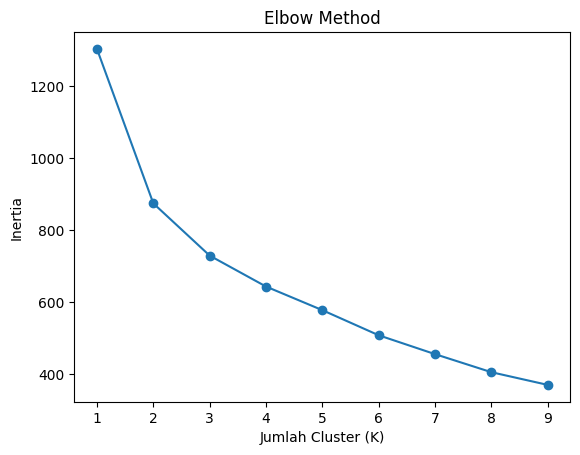

In [78]:
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled_onehot)
    inertia.append(kmeans.inertia_)
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

### Modeling dengan jumlah cluster yang di tentukan

In [79]:
K = 3
kmeans = KMeans(n_clusters=K, random_state=42, n_init=20, algorithm='elkan', init='k-means++')
kmeans.fit(df_scaled_onehot)
labels_one = kmeans.labels_
df_onehot['Cluster'] = labels_one
df_onehot.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Male,...,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,family_history_with_overweight_yes,Cluster
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,Normal_Weight,0,...,0,0,0,1,0,0,1,0,1,2
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,Normal_Weight,0,...,0,0,1,0,0,0,1,0,1,2
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,Normal_Weight,1,...,0,1,0,0,0,0,1,0,1,2
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,Overweight_Level_I,1,...,0,1,0,0,0,0,0,1,0,2
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,Overweight_Level_II,1,...,0,0,1,0,0,0,1,0,0,2


In [80]:

#shilhouette score
score = silhouette_score(df_scaled_onehot, labels_one)
print(f'Silhouette Score: {score}')


Silhouette Score: 0.4683161450386147


## Modeling dengan menggabungkan Dataset yang di encode dengan OneHot dan Label

### Load Dataset dan Feature Selection

In [81]:
df_label = pd.read_csv('DataCleanLabel.csv')
df_onehot = pd.read_csv('DataCleanOneHot.csv')
# p = 'Weight', 'Height', 'family_history_with_overweight', 'FAVC', 'CAEC_Sometimes', 'CAEC_no', 'FAF', 'CAEC_Frequently',
# feature_label = [['Weight', 'Height', 'family_history_with_overweight', 'FAVC', "FAF", "FCVC", "NCP", "SMOKE", "SCC"]]
# feature_onehot = [['CAEC_Sometimes', 'CAEC_no', 'CAEC_Frequently']]

# display(df_label.head(5))
# display(df_onehot.head(5))
df_combine_cluster = pd.DataFrame(
   {
      'FAVC': df_label['FAVC'],
      'FAF': df_label['FAF'],
      'CAEC_Sometimes': df_onehot['CAEC_Sometimes'],
      'CAEC_no': df_onehot['CAEC_no'],
      'CAEC_Frequently': df_onehot['CAEC_Frequently'],
      'FCVC': df_label['FCVC'],
      'NCP': df_label['NCP'],
      'SMOKE': df_label['SMOKE'],
      'SCC': df_label['SCC'],
   }
)



display(df_combine_cluster.head(5))

,FAVC,FAF,CAEC_Sometimes,CAEC_no,CAEC_Frequently,FCVC,NCP,SMOKE,SCC
0,0,0.0,1,0,0,2.0,3.0,0,0
1,0,3.0,1,0,0,3.0,3.0,1,1
2,0,2.0,1,0,0,2.0,3.0,0,0
3,0,2.0,1,0,0,3.0,3.0,0,0
4,0,0.0,1,0,0,2.0,1.0,0,0


### Scaling data dan Menentukan jumlah cluster menggunakan elbow method

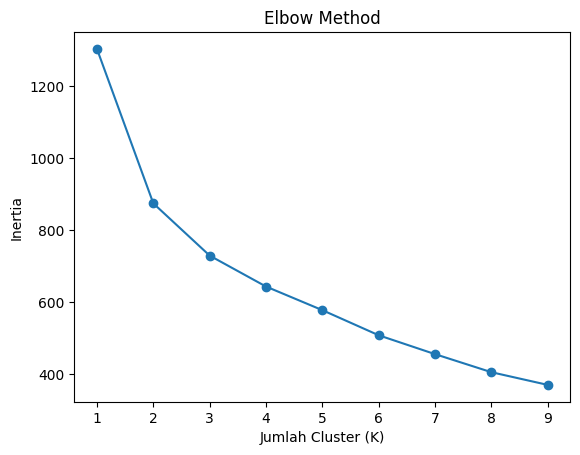

In [82]:
#Data Standardization
scaler = MinMaxScaler()
df_scaled_combine = scaler.fit_transform(df_combine_cluster)
inertia = []
K_range = range(1, 10)  
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled_combine)
    inertia.append(kmeans.inertia_)
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


### Modeling dengan jumlah yang di pilih

In [83]:
K = 3
kmeans = KMeans(n_clusters=K, random_state=42, n_init=20, algorithm='elkan', init='k-means++')
kmeans.fit(df_scaled_combine)
labels_combine = kmeans.labels_
df_combine_cluster['Cluster'] = labels_combine
df_combine_cluster.head()


,FAVC,FAF,CAEC_Sometimes,CAEC_no,CAEC_Frequently,FCVC,NCP,SMOKE,SCC,Cluster
0,0,0.0,1,0,0,2.0,3.0,0,0,2
1,0,3.0,1,0,0,3.0,3.0,1,1,2
2,0,2.0,1,0,0,2.0,3.0,0,0,2
3,0,2.0,1,0,0,3.0,3.0,0,0,2
4,0,0.0,1,0,0,2.0,1.0,0,0,2


In [84]:
#Silhouette Score
score = silhouette_score(df_scaled_combine, labels_combine)
print(f'Silhouette Score: {score}')


Silhouette Score: 0.4683161450442682
